In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

import plot_ratemap_sequence as prs

67 sessions!
67 sessions!


In [2]:
import h5py
sys.path.append('/mnt/home/szheng/projects/place_variability/code/thomas_18_data')
import prep_thomas_data as ptd
import prep_thomas_one_region as ptor
reload(ptor)
thomas_dir_base = "/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1"
import fr_map_thomas_all_sess as fmtas
import netrep
reload(database)
thomas_db=database.get_thomas_180301_DG_CA3_CA1_db(dosave=True)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
fn_full = '/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1.h5'

f = h5py.File(fn_full, 'r')

In [10]:
sys.path.append('/mnt/home/szheng/projects/place_variability/code/thomas_18_data')
import prep_thomas_data as ptd
reload(ptd)
exp_ind= 0
sess_ind=0
region='CA1'
prep_res = ptd.prep_one_category_within_one_exp(f,exp_ind,sess_ind,region=region)



In [13]:
%%time
reload(ptd)
exp_ind = 0
day_ind = 0
prep_res = ptd.prep_one_day_within_one_exp(f,exp_ind,day_ind,region='CA1')

CPU times: user 12.3 s, sys: 222 ms, total: 12.6 s
Wall time: 12.6 s


/mnt/home/szheng/projects/place_variability/code/prep_thomas_data.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spk_beh_df_one_trial['trial'] = trial_index
/mnt/home/szheng/projects/place_variability/code/prep_thomas_data.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spk_beh_df_one_trial['trial'] = trial_index
/mnt/home/szheng/projects/place_variability/code/prep_thomas_data.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [24]:
spk_beh_df = prep_res['spk_beh_df']
spk_beh_df,_=dpp.add_lin_binned(spk_beh_df,bin_size=0.025,nbins=None)
prep_res['spk_beh_df'] = spk_beh_df

In [23]:
spk_beh_df

,0,1,2,3,4,5,6,7,8,9,...,572,573,lin,directed_locomotion,index_within,isnovel,trial_type,task_index,trial,lin_binned
0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,0.000000,0.17435,0.0,0,0,0,0,0,6
1,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,...,-0.0,0.210490,0.18449,1.0,0,0,0,0,0,7
2,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,0.180620,0.19731,1.0,0,0,0,0,0,7
3,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.025865,0.20475,1.0,0,0,0,0,0,7
4,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.087240,0.21136,1.0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.000000,2.04240,1.0,10,1,1,0,38,81
6290,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,0.0,0.000000,2.04260,1.0,10,1,1,0,38,81
6291,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,0.0,0.000000,2.04320,1.0,10,1,1,0,38,81
6292,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.000000,2.05880,1.0,10,1,1,0,38,82


In [18]:
import fr_map_one_session as fmos
reload(fmos)

In [25]:
spk_beh_df['lin_binned']

0        6
1        7
2        7
3        7
4        8
        ..
6289    81
6290    81
6291    81
6292    82
6293    85
Name: lin_binned, Length: 6294, dtype: int64

In [29]:
reload(fmos)

<module 'fr_map_one_session' from '/mnt/home/szheng/projects/place_variability/code/fr_map_one_session.py'>

In [30]:
fr_map_res=fmos.analyze_data(prep_res,gauss_width=1.)

cant format into a dataframe
cant format into a dataframe


In [61]:
fr_map_res['fr_map']

lin_binned        0         1         2         3         4         5   \
0 0         0.012415  0.013016  0.031023  0.092830  0.123229  0.158371   
  1         0.073457  0.072836  0.077191  0.084063  0.079486  0.070511   
  2         0.029974  0.031992  0.038182  0.051829  0.060912  0.043135   
  3         0.045303  0.037970  0.027193  0.015754  0.012007  0.009355   
  4         0.004116  0.004075  0.004006  0.003832  0.019181  0.060639   
...              ...       ...       ...       ...       ...       ...   
1 569       0.000000  0.000007  0.001206  0.037561  0.043392  0.037092   
  570       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
  571       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
  572       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
  573       0.025207  0.024781  0.018563  0.009594  0.005087  0.002357   

lin_binned        6         7         8         9   ...        75        76  \
0 0         0.172602  0.133197  0.093335  0.070708  ...  0.000004  0.000120   
  1         0.066594  0.080855  0.128005  0.190351  ...  0.003746  0.001912   
  2         0.037604  0.035524  0.037366  0.032646  ...  0.053756  0.051392   
  3         0.007371  0.006906  0.007121  0.006694  ...  0.056846  0.037966   
  4         0.067754  0.078230  0.091800  0.109086  ... -0.000206 -0.000039   
...              ...       ...       ...       ...  ...       ...       ...   
1 569       0.026769  0.016500  0.008290  0.001026  ...  0.058500  0.034146   
  570       0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
  571       0.000000  0.000000  0.000015  0.000529  ...  0.000000  0.000000   
  572       0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
  573       0.001598  0.000855  0.000265  0.000027  ...  0.000000  0.000000   

lin_binned        77            78            79        80        81  \
0 0         0.001428  6.883664e-03  1.466908e-02  0.014492  0.011724   
  1         0.000129  8.394653e-06  2.478075e-07  0.000000  0.000000   
  2         0.045730  4.733129e-02  3.129700e-02  0.019067  0.010810   
  3         0.026704  2.426735e-02 -2.147511e-04 -0.000047 -0.000003   
  4        -0.000003 -7.658810e-08  0.000000e+00  0.000000  0.000000   
...              ...           ...           ...       ...       ...   
1 569       0.017101  2.936009e-03 -2.708846e-03 -0.001158 -0.000133   
  570       0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000   
  571       0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000   
  572       0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000   
  573       0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000   

lin_binned            82            83        84  
0 0         1.037619e-02  8.815505e-03  0.007690  
  1         0.000000e+00  0.000000e+00  0.000000  
  2         6.635146e-03  3.896696e-03  0.002206  
  3        -1.097373e-07  0.000000e+00  0.000000  
  4         0.000000e+00  0.000000e+00  0.000000  
...                  ...           ...       ...  
1 569      -8.292432e-06 -3.953094e-07  0.000000  
  570       0.000000e+00  0.000000e+00  0.000000  
  571       0.000000e+00  0.000000e+00  0.000000  
  572       0.000000e+00  0.000000e+00  0.000000  
  573       0.000000e+00  0.000000e+00  0.000000  

[1148 rows x 85 columns]

In [ ]:
spk_beh_df['task'] = 'virtualLinearThomas'

In [38]:
spk_beh_df['trial_type'] = spk_beh_df['isnovel']

In [39]:
spk_beh_df['trial_type']

0       0
1       0
2       0
3       0
4       0
       ..
6289    1
6290    1
6291    1
6292    1
6293    1
Name: trial_type, Length: 6294, dtype: int64

In [73]:
ddf=thomas_db.iloc[0]['data_dir_full']

In [74]:
ddf

'/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_7/day_0'

In [82]:
sys.path.append('/mnt/home/szheng/projects/place_variability/code/thomas_18_data/')
import fr_map_thomas_all_sess as fmtas
reload(fmtas)
reload(pa)
reload(database)

<module 'database' from '/mnt/home/szheng/projects/util_code/database.py'>

In [79]:
fr_map_one = fmtas.get_fr_map_one_day(ddf,force_reload=False,load_only=False,dosave=True)

cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_7/day_0/fr_map.p


In [101]:
%%time
reload(fmtas)
fr_map_res_all = fmtas.main(force_reload=True,load_only=False,dosave=True,bin_size=0.05,gauss_width=0.1)

cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_7/day_0/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_7/day_1/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_1/day_0/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_1/day_1/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_9/day_0/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_9/day_1/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG

cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_6/day_0/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_6/day_1/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_5/day_0/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_5/day_1/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_3/day_0/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_3/day_1/fr_map.p
cant format into a dataframe
cant format into a dataframe
saved at /mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_

# try embedding of the sessions

In [56]:
from scipy.spatial.distance import cdist,pdist,squareform

In [9]:
%%time
fr_map_res_all = fmtas.main(force_reload=False,load_only=True,dosave=True)

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/fr_map_all.p exists; loading---
CPU times: user 650 ms, sys: 3.4 s, total: 4.05 s
Wall time: 4.05 s


In [11]:
fr_map_one_exp = fr_map_res_all['fr_map_all'].loc['CA1',0]

/tmp/ipykernel_614291/2013469220.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_one_exp = fr_map_res_all['fr_map_all'].loc['CA1',0]


In [51]:
from netrep.metrics import LinearMetric,GaussianStochasticMetric

# Rotationally invariant metric (fully regularized).
proc_metric = LinearMetric(alpha=1.0, center_columns=True,zero_pad=True)
gauss_metric = GaussianStochasticMetric(alpha=1)

In [45]:
k_l = []
val_l = []
val_flatten_l = []
val_max_norm_l = []
val_max_norm_flatten_l = []
common_ind = range(5,180)
comparison_sc = 0.5
for k,val in fr_map_one_exp.groupby(level=(0,1)):
    k_l.append(k)
    val = val[common_ind].fillna(0)
    total_max = val.max().max()
    val_max_norm = val / np.maximum(np.max(val.values,axis=1,keepdims=True),total_max*comparison_sc)
    val_max_norm_l.append(val_max_norm)
    val_l.append(val)
    val_flatten_l.append(val.values.flatten())
    val_max_norm_flatten_l.append(val_max_norm.values.flatten())
val_flatten_l=np.array(val_flatten_l)
val_max_norm_flatten_l = np.array(val_max_norm_flatten_l)
k_l =np.array(k_l)


In [60]:
fr_map_all = fr_map_res_all['fr_map_all']

In [63]:
exp_ind = 0
fr_map_all_sub = fr_map_all.loc[(slice(None),exp_ind,slice(None),slice(None)),:]

In [78]:
gpb = fr_map_all_sub.groupby(level=(0,1,2,3))

k_l = []
val_l = []
val_flatten_l = []
val_max_norm_l = []
val_max_norm_flatten_l = []
common_ind = range(0,40)
comparison_sc = 0.5
for k,val in gpb:
    k_l.append(k)
    val = val[common_ind].fillna(0)
    not_all_0 = val.sum(axis=1)!=0
    val = val.loc[not_all_0]
    
    total_max = val.max().max()
    val_max_norm = val / np.maximum(np.max(val.values,axis=1,keepdims=True),total_max*comparison_sc)
    val_max_norm_l.append(val_max_norm.T)
    val_l.append(val.T)
    val_flatten_l.append(val.values.flatten())
    val_max_norm_flatten_l.append(val_max_norm.values.flatten())
val_flatten_l=np.array(val_flatten_l)
val_max_norm_flatten_l = np.array(val_max_norm_flatten_l)
k_l =np.array(k_l)




/tmp/ipykernel_614291/1407447170.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val_flatten_l=np.array(val_flatten_l)
/tmp/ipykernel_614291/1407447170.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val_max_norm_flatten_l = np.array(val_max_norm_flatten_l)


In [15]:
#euc dist
euc_dist = squareform(pdist(val_flatten_l))
euc_dist_max_norm = squareform(pdist(val_max_norm_flatten_l))
corr_dist = squareform(pdist(val_flatten_l,'correlation'))
corr_dist_max_norm = squareform(pdist(val_max_norm_flatten_l,'correlation'))
cos_dist =squareform(pdist(val_flatten_l,'cosine'))
cos_dist_max_norm =squareform(pdist(val_max_norm_flatten_l,'cosine'))

In [77]:
(val_l[2].sum(axis=0)==0).sum()

21

In [79]:
# shape
proc_dist, _ = proc_metric.pairwise_distances(val_l,verbose=True)
# proc_dist_max_norm, _ = proc_metric.pairwise_distances(val_max_norm_l,verbose=True)

Parallelizing 210 distance calculations with 40 processes.


Computing distances: 100%|██████████| 210/210 [00:24<00:00,  8.64it/s]


In [84]:
k_l = pd.DataFrame(k_l,columns=['region','exp_ind','day_ind','isnovel'])
mds_res_proc = fit_mds(proc_dist,k_l)

In [17]:
all_dist_d = {
    'euc':euc_dist,
    'euc_max_norm':euc_dist_max_norm,
    'corr':corr_dist,
    'corr_max_norm':corr_dist_max_norm,
    'cos':cos_dist,
    'cos_max_norm':cos_dist_max_norm
}

In [38]:
all_dist_d['proc'] = proc_dist
all_dist_d['proc_max_norm'] = proc_dist_max_norm

In [18]:
from sklearn.manifold import MDS

In [82]:
def fit_mds(dist_mat,label_l):
    mds=MDS(n_components=2,dissimilarity="precomputed")
    coord = mds.fit_transform(dist_mat)
    mds_res = pd.DataFrame(coord)
    if isinstance(label_l,pd.DataFrame):
        mds_res = pd.concat([mds_res,label_l],axis=1)
    else:
        mds_res['day_ind'] =label_l[:,0]
        mds_res['isnovel'] =label_l[:,1]
    return mds_res
    

In [83]:
mds_res_d = {}
for k,dist_mat in all_dist_d.items():
    mds_res = fit_mds(dist_mat,k_l)
    mds_res_d[k] = mds_res

In [100]:
fr_map_all.loc['DG',0,0,0]

/tmp/ipykernel_614291/3398844109.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_all.loc['DG',0,0,0]


lin_binned,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.003094,0.000000,0.114855,0.166313,0.084213,0.032331,0.056138,0.054180,0.036762,0.014948,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013219,0.012246,0.0
1,0.073613,0.079002,0.075243,0.064607,0.154960,0.251628,0.185033,0.202394,0.134465,0.176715,...,0.001377,0.043360,0.114719,0.061634,0.012496,0.003380,0.000000,0.000000,0.000000,0.0
2,0.031192,0.000000,0.047661,0.033417,0.033629,0.023535,0.008766,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.023376,0.061832,0.026692,0.040982,0.012092,0.0
3,0.040462,0.000000,0.011170,0.005031,0.007193,0.003025,0.009826,0.009125,0.040199,0.016434,...,0.088968,0.079920,0.040577,0.012572,0.039481,0.078108,0.003006,-0.000357,0.000000,0.0
4,0.000000,0.000000,0.003087,0.009661,0.082080,0.104851,0.044969,0.034616,0.074107,0.031790,...,0.047931,0.127385,0.072943,0.016741,0.002377,-0.000248,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,0.000000,0.000000,0.013323,0.011818,0.001427,0.000247,0.000000,0.000000,0.000000,0.007396,...,0.000000,0.000000,0.020095,0.064939,0.043539,0.003355,-0.000372,0.000000,0.000000,0.0
570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
571,0.000000,0.000000,0.008816,0.004459,-0.000734,0.000000,0.005849,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
572,0.000756,0.000000,0.007751,0.001473,0.001242,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.008809,0.001294,0.000000,0.000000,0.000000,0.0


In [99]:
fr_map_all.loc['CA1',0,0,0]

/tmp/ipykernel_614291/4010058574.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_all.loc['CA1',0,0,0]


lin_binned,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.003094,0.000000,0.114855,0.166313,0.084213,0.032331,0.056138,0.054180,0.036762,0.014948,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013219,0.012246,0.0
1,0.073613,0.079002,0.075243,0.064607,0.154960,0.251628,0.185033,0.202394,0.134465,0.176715,...,0.001377,0.043360,0.114719,0.061634,0.012496,0.003380,0.000000,0.000000,0.000000,0.0
2,0.031192,0.000000,0.047661,0.033417,0.033629,0.023535,0.008766,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.023376,0.061832,0.026692,0.040982,0.012092,0.0
3,0.040462,0.000000,0.011170,0.005031,0.007193,0.003025,0.009826,0.009125,0.040199,0.016434,...,0.088968,0.079920,0.040577,0.012572,0.039481,0.078108,0.003006,-0.000357,0.000000,0.0
4,0.000000,0.000000,0.003087,0.009661,0.082080,0.104851,0.044969,0.034616,0.074107,0.031790,...,0.047931,0.127385,0.072943,0.016741,0.002377,-0.000248,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,0.000000,0.000000,0.013323,0.011818,0.001427,0.000247,0.000000,0.000000,0.000000,0.007396,...,0.000000,0.000000,0.020095,0.064939,0.043539,0.003355,-0.000372,0.000000,0.000000,0.0
570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
571,0.000000,0.000000,0.008816,0.004459,-0.000734,0.000000,0.005849,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
572,0.000756,0.000000,0.007751,0.001473,0.001242,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.008809,0.001294,0.000000,0.000000,0.000000,0.0


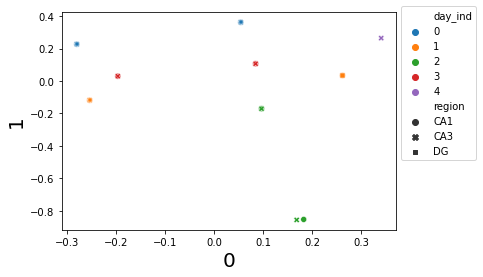

In [94]:
ax=sns.scatterplot(data=mds_res_proc,x=0,y=1,hue='day_ind',style='region')
ax.legend(bbox_to_anchor=[1,1.05])

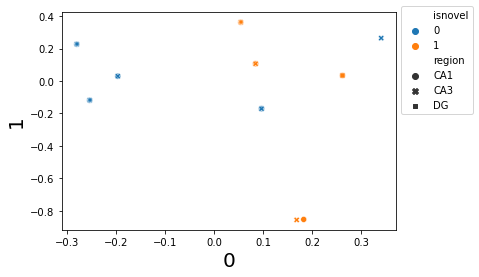

In [90]:
ax=sns.scatterplot(data=mds_res_proc,x=0,y=1,hue='isnovel',style='region')
ax.legend(bbox_to_anchor=[1,1.05])

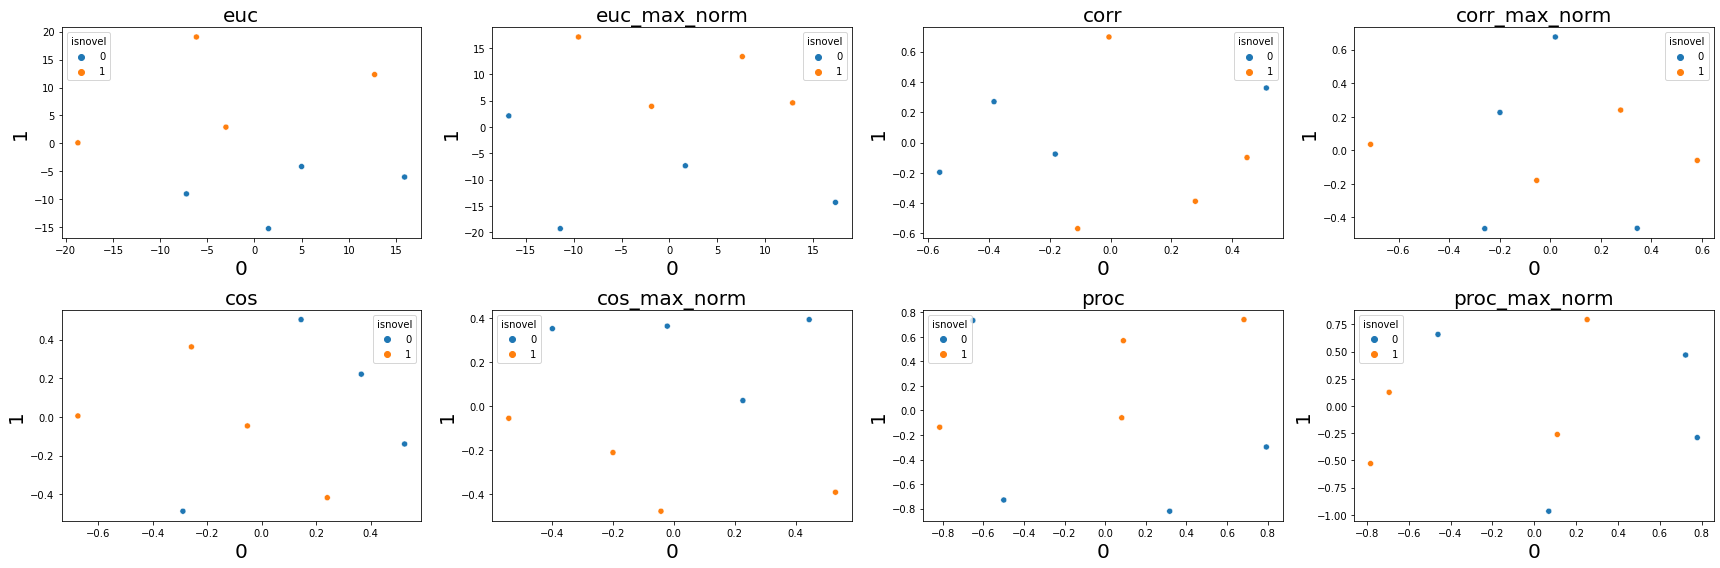

In [40]:
nplots = len(mds_res_d)
fig,axs=ph.subplots_wrapper(nplots)
for ii,(k,mds_res) in enumerate(mds_res_d.items()):
    ax=axs.ravel()[ii]
    sns.scatterplot(data=mds_res,x=0,y=1,hue='isnovel',ax=ax)
    ax.set_title(k)
plt.tight_layout()

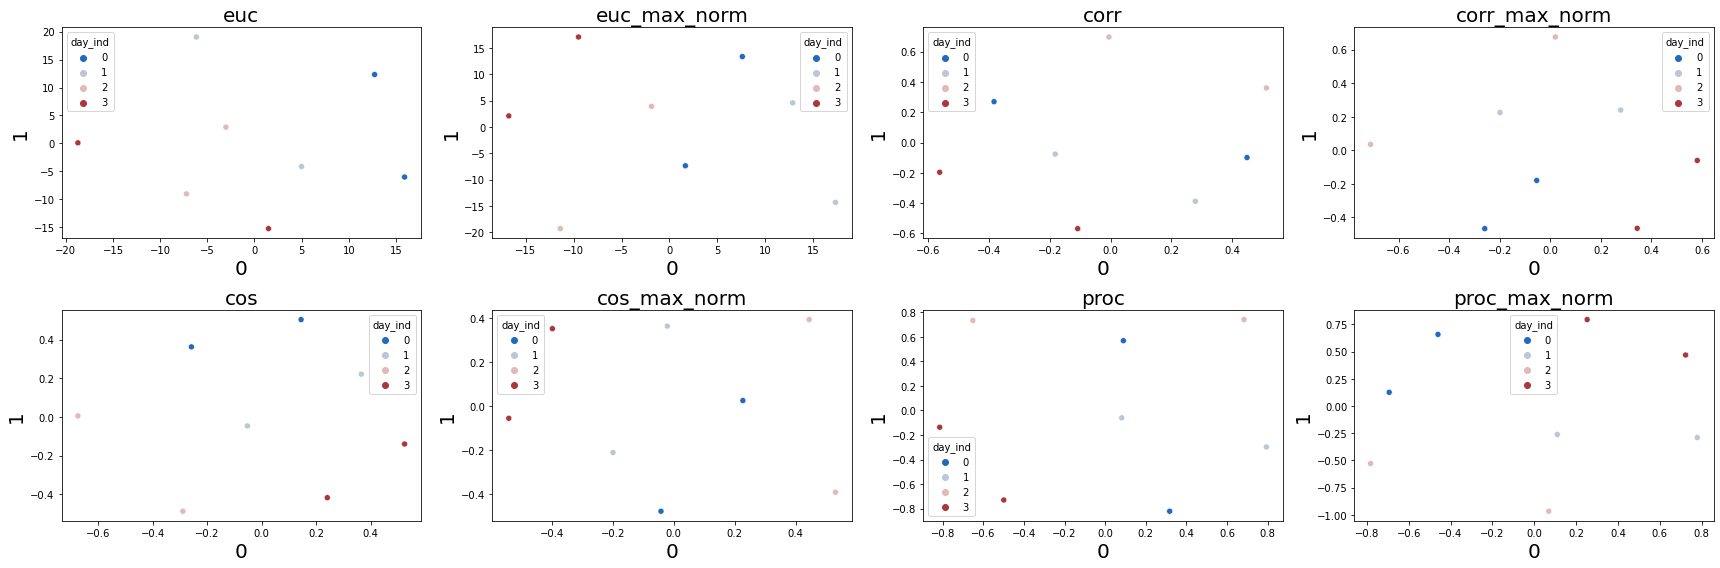

In [41]:
nplots = len(mds_res_d)
fig,axs=ph.subplots_wrapper(nplots)
for ii,(k,mds_res) in enumerate(mds_res_d.items()):
    ax=axs.ravel()[ii]
    sns.scatterplot(data=mds_res,x=0,y=1,hue='day_ind',ax=ax,palette='vlag')
    ax.set_title(k)
plt.tight_layout()

In [149]:
mds=MDS(n_components=2,dissimilarity="precomputed")

In [151]:
coord = mds.fit_transform(dist_mat)

In [152]:
mds_res = pd.DataFrame(coord)

In [158]:
mds_res['day_ind'] =k_l[:,0]
mds_res['isnovel'] =k_l[:,1]

<Axes: xlabel='0', ylabel='1'>

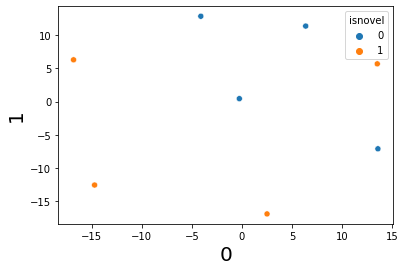

In [164]:
sns.scatterplot(data=mds_res,x=0,y=1,hue='isnovel')

<Axes: xlabel='0', ylabel='1'>

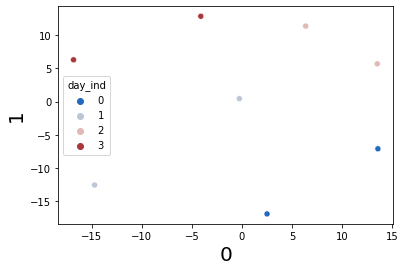

In [168]:
sns.scatterplot(data=mds_res,x=0,y=1,hue='day_ind',palette='vlag')

In [167]:
val

lin_binned       5         6         7         8         9         10   \
3 1 0       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    1       0.013021  0.021040  0.024911  0.025706  0.025116  0.023827   
    2       0.044328  0.072798  0.087748  0.095246  0.104861  0.143818   
    3       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    4       0.086193  0.082958  0.081285  0.078339  0.064998  0.044757   
...              ...       ...       ...       ...       ...       ...   
    569     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    570     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    571     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    572     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    573     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

lin_binned       11        12        13        14   ...       170       171  \
3 1 0       0.000000  0.000080  0.000193  0.000410  ...  0.049445  0.043342   
    1       0.022152  0.020293  0.018344  0.016303  ...  0.000000  0.000000   
    2       0.174329  0.181919  0.186913  0.187726  ...  0.000040  0.000154   
    3       0.000000  0.000000  0.000000  0.000000  ...  0.003215  0.005958   
    4       0.026667  0.023132  0.018360  0.013329  ...  0.008428  0.005980   
...              ...       ...       ...       ...  ...       ...       ...   
    569     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
    570     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
    571     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
    572     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
    573     0.000000  0.000004  0.000019  0.000078  ...  0.000000  0.000000   

lin_binned       172       173       174       175       176       177  \
3 1 0       0.038266  0.034103  0.030841  0.028206  0.025639  0.022659   
    1       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    2       0.000516  0.001487  0.003646  0.007549  0.013162  0.019517   
    3       0.009650  0.013542  0.016314  0.016771  0.014640  0.010904   
    4       0.004042  0.002633  0.001652  0.000981  0.000536  0.000261   
...              ...       ...       ...       ...       ...       ...   
    569     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    570     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    571     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    572     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    573     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

lin_binned       178       179  
3 1 0       0.019100  0.015206  
    1       0.000000  0.000000  
    2       0.025573  0.031444  
    3       0.007136  0.004318  
    4       0.000116  0.000068  
...              ...       ...  
    569     0.000000  0.000000  
    570     0.000000  0.000000  
    571     0.000000  0.000000  
    572     0.000000  0.000000  
    573     0.000000  0.000000  

[574 rows x 175 columns]

/tmp/ipykernel_534366/1792248439.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data=fr_map_res_all['fr_map_all'].loc['CA1',0,0,0]


(<Figure size 432x288 with 1 Axes>,
 <Axes: >,
 Int64Index([527,  21, 282,  85, 491, 139, 358, 275, 365, 408,
             ...
             372, 417, 515, 132, 374, 494, 118, 521, 330, 453],
            dtype='int64', length=574))

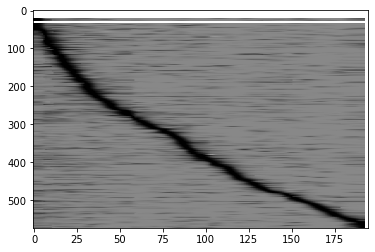

In [94]:
data=fr_map_res_all['fr_map_all'].loc['CA1',0,0,0]
prs.plot_population_sequence(data)

In [18]:
cell_cols_mask = np.array([isinstance(x,int) for x in prep_res['spk_beh_df'].columns])
cell_cols = prep_res['spk_beh_df'].columns[cell_cols_mask]

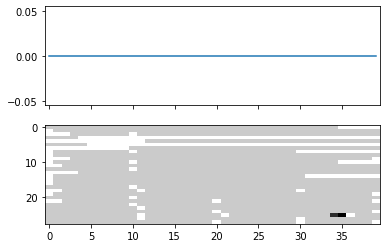

In [63]:
fig,axs=plt.subplots(2,1,sharex=True)
uid = 66
pf_ma = place_field_all_cells[uid]
ax=axs[0]
ax.plot(pf_ma)
ax=axs[1]
ax.imshow(dfoy_alltrials_all_cells[uid].T,aspect='auto')

In [266]:
lin_alltrials

array([0.012157, 0.012138, 0.012152, ..., 0.011046, 0.011091, 0.01107 ])

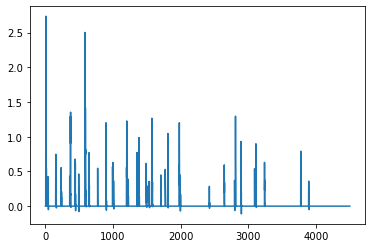

In [242]:
plt.plot(dfot_alltrials_all_cells[0]*transientmask_alltrials_all_cells[0])

In [243]:
dfot_alltrials_all_cells[ind_sorted]*transientmask_alltrials_all_cells[ind_sorted]

array([[ 0.,  0.,  0., ..., -0., -0., -0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., -0., ..., -0.,  0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0., -0.,  0., ...,  0.,  0., -0.]])

In [270]:
lin_alltrials.shape

(4499,)

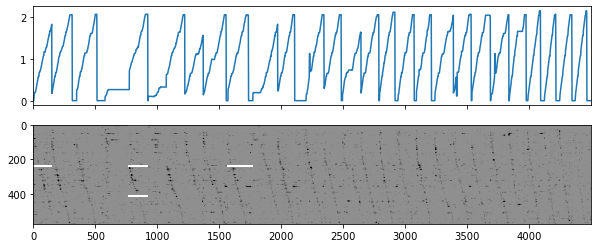

In [269]:
fig,axs=plt.subplots(2,1,figsize=(10,4),sharex=True)
ax=axs[0]
ax.plot(lin_alltrials)
ax=axs[1]
dfot_alltrials_all_cells_sorted_masked=dfot_alltrials_all_cells[ind_sorted]*transientmask_alltrials_all_cells[ind_sorted]

ax.imshow(dfot_alltrials_all_cells_sorted_masked,aspect='auto',vmax=0.6)

In [231]:
dfot_alltrials.shape

(4499, 1)

In [221]:
pop_ratemap=np.nanmean(dfoy_alltrials_all_cells,axis=-1)

In [216]:
import plot_ratemap_sequence as prs

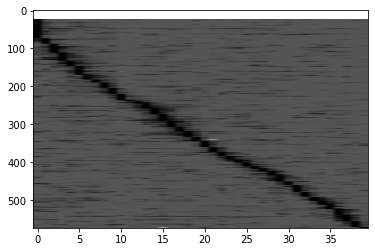

In [225]:
pop_ratemap = pd.DataFrame(pop_ratemap)
fig,ax,ind_sorted=prs.plot_population_sequence(pop_ratemap)

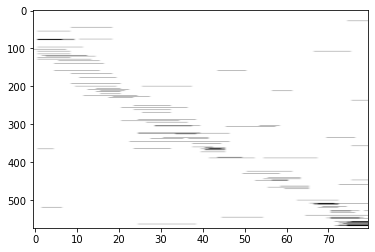

In [228]:
plt.imshow(onehot_placefield_all_cells[ind_sorted],aspect='auto')

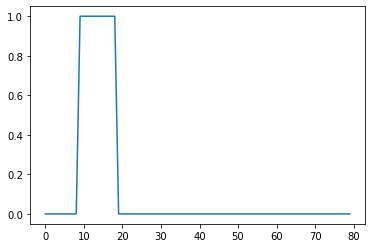

In [211]:
plt.plot(np.squeeze(one_cell_cat['placefield']))

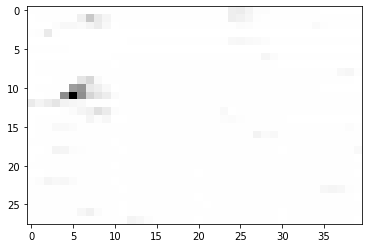

In [212]:
plt.imshow(dfoy_alltrials,aspect='auto')

In [13]:
f[one_cell_cat['dFoY'][0,0]]

(1, 40)

In [37]:
sess_ind = 0
one_sess=f[one_exp['metadata']['categories'][sess_ind,0]]

In [39]:
one_sess.keys()

<KeysViewHDF5 ['PV', 'acquisition_rate', 'filename', 'ft', 'licks', 'moving', 'pupil_area', 'rewardpoints', 'rewardzone', 'tforms', 'x', 'y']>

In [70]:
traj_one_sess = one_sess['y']
trial_ind=0

traj_one_trial = np.squeeze(f[traj_one_sess[trial_ind,0]])


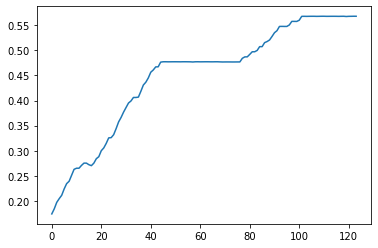

In [71]:
plt.plot(traj_one_trial)

In [6]:
sth=f[f['data']['CA1'][1][0]]

In [7]:
within_cell=f[sth['cells'][0][0]]

In [8]:
dfot=f[f[within_cell['categories'][0][0]]['dFoT'][0,0]]

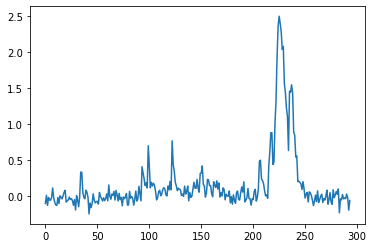

In [12]:
plt.plot(dfot)

NameError: name 'CA1' is not defined